# **Set 3 problem 3**

(1 point) Given the system of inequalities below, determine the shape of the feasible region and find the vertices of the feasible region. Give the shape as "triangle", "quadrilateral", or "unbounded". Report your vertices starting with the one which has the smallest x-value. If more than one vertex has the same, smallest x-value, start with the one that has the smallest y-value. Proceed clockwise from the first vertex. Leave any unnecessary answer spaces blank.

x+y≤93
x+y≥10
x≥0y≥0

# Corner points

In [1]:
import sympy as sp

x, y = sp.symbols('x y')

# Equations
eq1 = sp.Eq(x + y, 9)
eq2 = sp.Eq(3*x + y, 10)
eq3 = sp.Eq(y, 0)

# Intersections
A = sp.solve((eq1, eq2), (x, y))
B = sp.solve((eq2, eq3), (x, y))
C = sp.solve((eq1, eq3), (x, y))

A, B, C


({x: 1/2, y: 17/2}, {x: 10/3, y: 0}, {x: 9, y: 0})

# Graph Feaisible Set

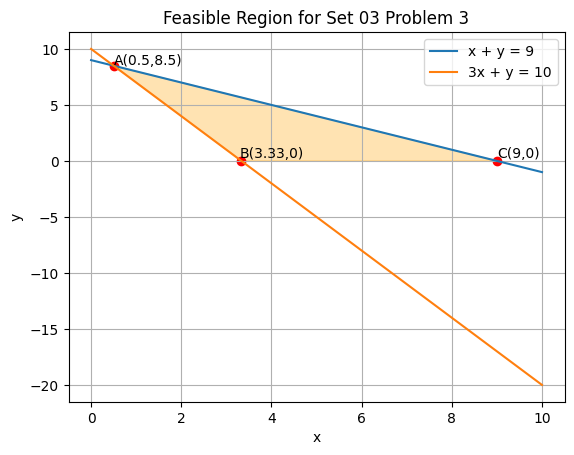

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x_vals = np.linspace(0, 10, 400)
y1 = 9 - x_vals
y2 = 10 - 3*x_vals

plt.plot(x_vals, y1, label='x + y = 9')
plt.plot(x_vals, y2, label='3x + y = 10')

# Fill feasible region
plt.fill([0.5, 9, 10/3], [8.5, 0, 0], color='orange', alpha=0.3)

# Label points
plt.scatter([0.5, 10/3, 9], [8.5, 0, 0], color='red')
plt.text(0.5, 8.6, 'A(0.5,8.5)')
plt.text(3.3, 0.3, 'B(3.33,0)')
plt.text(9, 0.3, 'C(9,0)')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Feasible Region for Set 03 Problem 3')
plt.legend()
plt.grid(True)
plt.show()


# Evaluate Objective Function P=3x+2y

In [4]:
# Step 4 – Evaluate P = 3x + 2y at each vertex (fixed version)

import sympy as sp

def P(x, y):
    return 3*x + 2*y

# Vertices from earlier steps
A = {sp.Symbol('x'): 0.5, sp.Symbol('y'): 8.5}
B = {sp.Symbol('x'): 10/3, sp.Symbol('y'): 0}
C = {sp.Symbol('x'): 9, sp.Symbol('y'): 0}

points = {'A': A, 'B': B, 'C': C}

for name, vals in points.items():
    xv, yv = vals[sp.Symbol('x')], vals[sp.Symbol('y')]
    print(f"{name} → P = {P(xv, yv)}")


A → P = 18.5
B → P = 10.0
C → P = 27


# Introduce Slack Variables & Re-find Corner Points

In [5]:
import sympy as sp

x, y, s1, s2 = sp.symbols('x y s1 s2', nonnegative=True)

# convert inequalities to equalities
eq1 = sp.Eq(x + y + s1, 9)      # ≤  →  +s1
eq2 = sp.Eq(3*x + y - s2, 10)   # ≥  →  –s2

# intersections (slacks = 0 at active constraints)
c1 = sp.solve((eq1.subs(s1,0), eq2.subs(s2,0)), (x,y))
c2 = sp.solve((eq2.subs(s2,0), sp.Eq(y,0)), (x,y))
c3 = sp.solve((eq1.subs(s1,0), sp.Eq(y,0)), (x,y))

print("Corner 1 (both active):", c1)
print("Corner 2 (3x+y=10 & y=0):", c2)
print("Corner 3 (x+y=9 & y=0):", c3)


Corner 1 (both active): {x: 1/2, y: 17/2}
Corner 2 (3x+y=10 & y=0): {x: 10/3, y: 0}
Corner 3 (x+y=9 & y=0): {x: 9, y: 0}


# Solve Using Python’s Built-in Solver

In [6]:
from scipy.optimize import linprog

# Maximize 3x + 2y  ->  Minimize -3x - 2y
c = [-3, -2]
A = [[1, 1], [-3, -1]]
b = [9, -10]
bounds = [(0, None), (0, None)]

res = linprog(c, A_ub=A, b_ub=b, bounds=bounds, method='highs')
print("Optimal solution (x, y):", res.x)
print("Maximum P:", -res.fun)


Optimal solution (x, y): [9. 0.]
Maximum P: 27.0


# **Set 4 Problem ^**

# Equations with LaTeX encoded

In [8]:
from sympy import symbols, Eq

# Define variables
x, y = symbols('x y')

# Define the equations
eq1 = Eq(22*x + 11*y, 770)   # Production hours
eq2 = Eq(90*x + 75*y, 3810)  # Material constraint

print("Linear Programming Model\n")
print(r"Maximize: P = 256x + 160y")
print(r"Subject to:")
print(r"22x + 11y <= 770")
print(r"90x + 75y <= 3810")
print(r"x >= 0, y >= 0")


Linear Programming Model

Maximize: P = 256x + 160y
Subject to:
22x + 11y <= 770
90x + 75y <= 3810
x >= 0, y >= 0


# Finding Corner Points

In [19]:
from sympy import solve

# Solve intersections
sol12 = solve((eq1, eq2), (x, y))
x1 = solve(eq1.subs(y, 0))[0]
y1 = solve(eq1.subs(x, 0))[0]
x2 = solve(eq2.subs(y, 0))[0]
y2 = solve(eq2.subs(x, 0))[0]
# Potential corner points
corners = [
    (0, 0),
    (float(x1), 0),
    (0, float(y1)),
    (float(x2), 0),
    (0, float(y2)),
    (float(sol12[x]), float(sol12[y]))
]

# Keep only feasible points
feasible = []
for (xx, yy) in corners:
    if 22*xx + 11*yy <= 770 and 90*xx + 75*yy <= 3810 and xx >= 0 and yy >= 0:
        feasible.append((xx, yy))

print("Feasible Corner Points:")
for p in feasible:
    print(p)


Feasible Corner Points:
(0, 0)
(35.0, 0)
(0, 50.8)
(24.0, 22.0)


# Graph Feasible Region

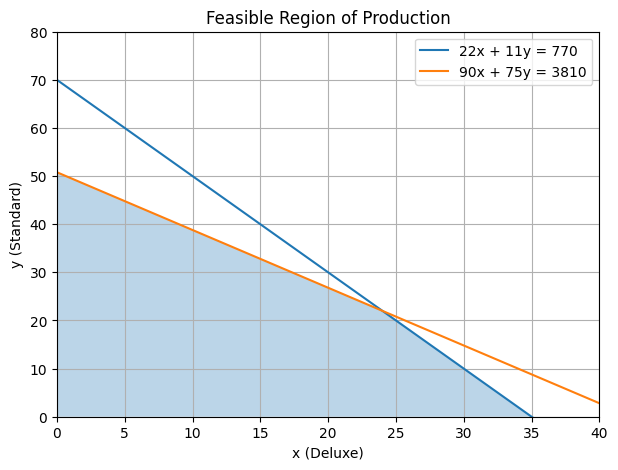

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Create x values for plotting
x_vals = np.linspace(0, 40, 200)
y1_line = (770 - 22*x_vals) / 11
y2_line = (3810 - 90*x_vals) / 75

plt.figure(figsize=(7,5))
plt.plot(x_vals, y1_line, label='22x + 11y = 770')
plt.plot(x_vals, y2_line, label='90x + 75y = 3810')
plt.xlim(0, 40)
plt.ylim(0, 80)

# Fill feasible region
plt.fill_between(x_vals, np.minimum(y1_line, y2_line), 0,
                 where=(y1_line>0)&(y2_line>0), alpha=0.3)

plt.xlabel('x (Deluxe)')
plt.ylabel('y (Standard)')
plt.title('Feasible Region of Production')
plt.legend()
plt.grid(True)
plt.show()


# Evaluating Objective Function

In [18]:
print("Evaluating Objective Function P = 256x + 160y\n")

best = (0, 0, 0)
for (xx, yy) in feasible:
    P = 256*xx + 160*yy
    print(f"At (x={xx}, y={yy}) => P = {P}")
    if P > best[2]:
        best = (xx, yy, P)

print(f"\nMaximum occurs at x={best[0]}, y={best[1]}, Revenue=${best[2]}")


Evaluating Objective Function P = 256x + 160y

At (x=0, y=0) => P = 0
At (x=35.0, y=0) => P = 8960.0
At (x=0, y=50.8) => P = 8128.0
At (x=24.0, y=22.0) => P = 9664.0

Maximum occurs at x=24.0, y=22.0, Revenue=$9664.0


# Introducing Slack Variable

In [17]:
# Introduce slack variables
s1, s2 = symbols('s1 s2', nonnegative=True)
slack_eq1 = Eq(22*x + 11*y + s1, 770)
slack_eq2 = Eq(90*x + 75*y + s2, 3810)

print("Slack Form Equations\n")
print(slack_eq1)
print(slack_eq2)


Slack Form Equations

Eq(s1 + 22*x + 11*y, 770)
Eq(s2 + 90*x + 75*y, 3810)


# Solveing Using SciPy Linear Programming Solver

In [16]:
from scipy.optimize import linprog

# Coefficients for Maximize P = 256x + 160y
# linprog minimizes, so use negatives
c = [-256, -160]

# Inequality matrix
A = [[22, 11],
     [90, 75]]
b = [770, 3810]

# Bounds (x, y >= 0)
bounds = [(0, None), (0, None)]

# Solve
result = linprog(c, A_ub=A, b_ub=b, bounds=bounds, method='highs')

print("Linear Programming Solver Result\n")
print(f"x (Deluxe) = {result.x[0]:.2f}")
print(f"y (Standard) = {result.x[1]:.2f}")
print(f"Maximum Revenue = ${-result.fun:.2f}")


Linear Programming Solver Result

x (Deluxe) = 24.00
y (Standard) = 22.00
Maximum Revenue = $9664.00
